In [1]:
import matplotlib.pyplot as plt
import cv2

# 실제 데이터 불러오기

In [2]:
cat4 = cv2.imread('../DATA/CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

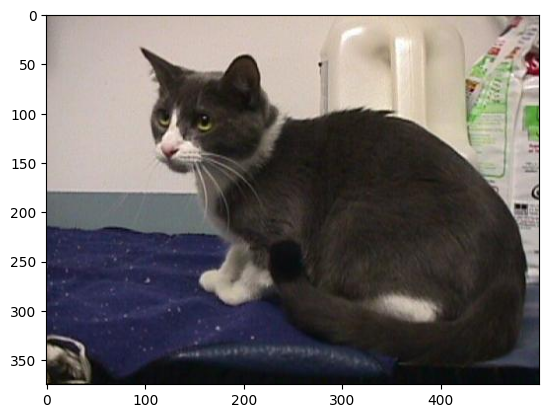

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog = cv2.imread('../DATA/CATS_DOGS/train/DOG/2.jpg')

In [7]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

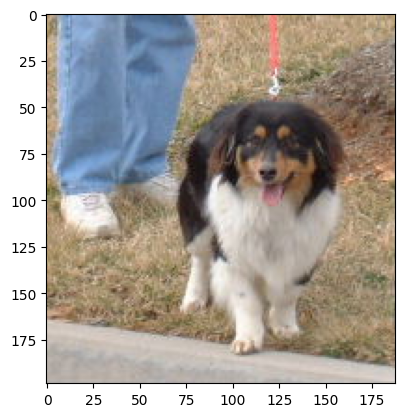

In [9]:
plt.imshow(dog)

# ImageDataGenerator로 데이터에 변환을 줘서 좋은 데이터 더 생성하기

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                               fill_mode='nearest'
                              )

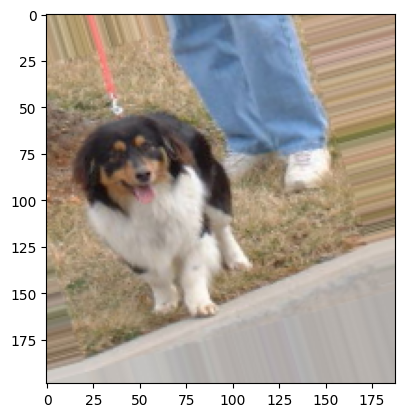

In [62]:
plt.imshow(image_gen.random_transform(dog))

In [60]:
image_gen.flow_from_directory('../DATA/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [21]:
input_shape = (150,150,3)

# 모델 생성

In [19]:
from keras.models import Sequential

In [26]:
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [37]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1)) # 0 for cat, 1 for dog
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 32)      

# 모델 학습

In [39]:
batch_size = 16 # 너무 큰 배치 사이즈는 네트워크 학습을 위해 순활할 때마다 너무 오래걸린다

train_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/train',
                                                     target_size=input_shape[:2],
                                                     batch_size=batch_size,
                                                     class_mode='binary')

test_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/test',
                                                     target_size=input_shape[:2],
                                                     batch_size=batch_size,
                                                     class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


## ImageDataGenerator를 이용해 각 class의 index도 볼 수 있다

In [40]:
train_image_generator.class_indices

{'CAT': 0, 'DOG': 1}

In [41]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                             validation_data=test_image_gen,validation_steps=12)

/var/folders/tt/w0w7vy_527b1wrbf2lblz38c0000gn/T/ipykernel_91356/2328083849.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,


150/150 [==============================] - 35s 228ms/step - loss: 0.6933 - accuracy: 0.5254 - val_loss: 0.7096 - val_accuracy: 0.5156


In [43]:
results.history['accuracy']

[0.5254166722297668]

In [44]:
from keras.models import load_model

In [45]:
# new_model = load_model('../')

In [48]:
dog_file = '../DATA/CATS_DOGS/test/DOG/10005.jpg'

# 새로 불러온 데이터도 150x150로 학습시킨 네트워크에 적용하려면 150x150으로 변환해야 한다

In [47]:
from keras.preprocessing import image

In [50]:
dog_img = image.image_utils.load_img(dog_file,target_size=(150,150))

In [51]:
dog_img = image.image_utils.img_to_array(dog_img)

In [52]:
dog_img.shape

(150, 150, 3)

# 신경망이 한 이미지의 배치로 인식되도록 dimension을 바꾸어야 한다

In [53]:
import numpy as np
dog_img = np.expand_dims(dog_img,axis=0)

In [54]:
dog_img.shape

(1, 150, 150, 3)

In [55]:
dog_img = dog_img/255

In [57]:
model.predict(dog_img)

1/1 [==============================] - 0s 105ms/step


array([[0.85972524]], dtype=float32)